In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import tensorflow as tf
import time as T
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# To stop potential randomness
seed = 1298
rng = np.random.RandomState(seed)

In [3]:
train = pd.read_csv('train.csv')

In [ ]:
train.head()

In [4]:
### set all variables

# number of neurons in each layer
input_num_units = 28*28
hidden_num_units = 300
output_num_units = 10
input_num_units

784

In [5]:
# define placeholders
x = tf.placeholder(tf.float32, [None, input_num_units])
y = tf.placeholder(tf.float32, [None, output_num_units])

In [6]:
learning_rate = 0.001

In [9]:
weights = {
    'hidden1': tf.Variable(tf.random_normal([input_num_units, hidden_num_units], seed=seed)),
    'hidden2': tf.Variable(tf.random_normal([hidden_num_units, hidden_num_units], seed=seed)),
    'hidden3': tf.Variable(tf.random_normal([hidden_num_units, hidden_num_units], seed=seed)),
    'output': tf.Variable(tf.random_normal([hidden_num_units, output_num_units], seed=seed))
}

biases = {
    'hidden1': tf.Variable(tf.random_normal([hidden_num_units], seed=seed)),
    'hidden2': tf.Variable(tf.random_normal([hidden_num_units], seed=seed)),
    'hidden3': tf.Variable(tf.random_normal([hidden_num_units], seed=seed)),
    'output': tf.Variable(tf.random_normal([output_num_units], seed=seed))
}

In [10]:
hidden_layer1 = tf.add(tf.matmul(x, weights['hidden1']), biases['hidden1'])
hidden_layer1 = tf.nn.relu(hidden_layer1)

hidden_layer2 = tf.add(tf.matmul(hidden_layer1, weights['hidden2']), biases['hidden2'])
hidden_layer2 = tf.nn.relu(hidden_layer2)

hidden_layer3 = tf.add(tf.matmul(hidden_layer2, weights['hidden3']), biases['hidden3'])
hidden_layer3 = tf.nn.relu(hidden_layer3)

output_layer = tf.matmul(hidden_layer3, weights['output']) + biases['output']

In [11]:
#need to define cost of our neural network; it is claculation of error cost

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=output_layer,labels = y))

In [12]:
# set the optimizer, i.e. our backpropogation algorithm. we use Adam; we reduce eroor by updating weights

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [13]:
# initialize all the variables 

init = tf.global_variables_initializer()

In [14]:
#start session
sess=tf.Session()
# create initialized variables
sess.run(init)

## this is where the magic happenes

In [58]:
t=T.clock()
for i in range(4200):
    dati=np.array(train.loc[i*10:(i+1)*10-1])#sedwe[:,0:1],sedwe[:,1:]
    sdws=np.zeros((10,10))
    for hyt in range(10):
        de=dati[hyt,0]
        sdws[hyt,de]=1.0
    huyt=dati[:,1:].astype(np.float32)
    sdws=sdws.astype(np.float32)
    _, c = sess.run([optimizer,cost],feed_dict={x:huyt,y:sdws})
    if i%1000==0:
        print c/1000,
print "time took",T.clock()-t

0.0 6.847125 86.5412734375 103.327921875 0.0 time took 86.21434


In [38]:
t=T.clock()
for i in range(11000):
    huyt=x_batch[i*10:(i+1)*10-1]#sedwe[:,0:1],sedwe[:,1:]
    sdws=y_true_batch[i*10:(i+1)*10-1]
    _, c = sess.run([optimizer,cost],feed_dict={x:huyt,y:sdws})
    if i%1000==0:
        print c/1000,
print "time took",T.clock()-t

0.204457000732 1.59488269043 0.0 0.0 0.5460390625 0.243596359253 0.69319720459 0.0 0.424442718506 0.395566833496 0.0 time took 160.319366


In [16]:
from tensorflow.examples.tutorials.mnist import input_data

In [35]:
data = input_data.read_data_sets("data/MNIST/", one_hot=True)
x_batch, y_true_batch = data.train.next_batch(1060000)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [49]:
x_test,Y_test=data.test.next_batch(1060000)

In [37]:
len(x_batch)/10

11000

# predicting step

In [50]:
t=T.clock()

predict = tf.argmax(output_layer, 1)
#test_x=np.array(test.loc[:])
pred = sess.run(predict,{x:x_test})

print "time took",T.clock()-t

time took 1.507202


In [52]:
j=0
jui=[]
coun=10000
for i in xrange(coun):
    if pred[i]!=np.argmax(Y_test[i]):
        j+=1;jui.append(i)
err=j*100.0/coun
print "error: ",err," count: ",j,'  accuracy: ',100-err

error:  7.03  count:  703   accuracy:  92.97


In [46]:
j

17993

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
test.head()

In [ ]:
t=T.clock()

predic = tf.argmax(output_layer, 1)
test_x=np.array(test.loc[:])
prede = sess.run(predic,{x: test_x})

print "time took",T.clock()-t

predicted:  0 truth:  9


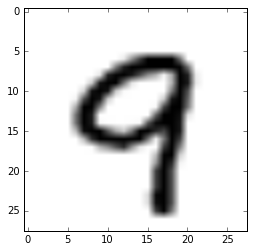

In [56]:
%matplotlib inline
img_shape=(28,28)
iou=jui[558]
plt.imshow(x_batch[iou].reshape(img_shape), cmap='binary')

print 'predicted: ',pred[iou],"truth: ",np.argmax(y_true_batch[iou])

In [ ]:
np.argmax(sess.run(output_layer,{x: test_x[1:3]})[1])

In [ ]:
test_x[1]

In [ ]:
pred[9]

In [ ]:
hyt

In [ ]:
test.shape

In [ ]:
t=T.clock()
sedwe=np.array(train.loc[0])

print sedwe[0:1],sedwe[1:],T.clock()-t


In [ ]:
huyt.shape

In [ ]:
len(list(dati[:,1:].astype(float))[0])

In [ ]:
sdws=np.zeros((100,10))
for i in range(100):
    d=np.random.randint(10)
    sdws[i,d]=1.0

In [ ]:
sdws.astype(int)

In [ ]:
len(x_batch)

In [ ]:
x_batch.shape,huyt.shape

In [ ]:
for i in range(42000):
    if((i+1)%1000==0):
        print i,